In [19]:
import warnings
warnings.filterwarnings("ignore")

from keras import models, layers

embedding_dim = 32

input_img = layers.Input(
    shape=(784,)             #28*28
)

# Encoding layer.
encoded = layers.Dense(embedding_dim, activation="relu")(input_img)

# Decoding layer.
decoded = layers.Dense(784, activation="sigmoid")(encoded)

print(input_img)
print(encoded,'\n\n')

# Autoencoder.
print("Autoencoder:")
autoencoder = models.Model(input_img, decoded) 
autoencoder.summary()

# Encoder.
print('\n\nEncoder:')
encoder = models.Model(input_img, encoded)
encoder.summary()

# Decoder.
print('\n\nDecoder:')
encoded_input = layers.Input(shape=(embedding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = models.Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()

Tensor("input_15:0", shape=(?, 784), dtype=float32)
Tensor("dense_19/Relu:0", shape=(?, 32), dtype=float32) 


Autoencoder:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_20 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


Encoder:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 784)               0         
_________________________________________________________________
den

In [21]:
autoencoder.compile(
    optimizer = "adadelta",       #gradient descent which changes learning rate over time
    loss = "binary_crossentropy"
)

In [23]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Before:\n",x_train.shape)
print(x_test.shape,'\n\n')

x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

print("After:\n",x_train.shape)
print(x_test.shape)

Before:
 (60000, 28, 28)
(10000, 28, 28) 


After:
 (60000, 784)
(10000, 784)


In [27]:
history = autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1023 - val_loss: 0.1006
Epoch 2/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.1020 - val_loss: 0.1003
Epoch 3/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1016 - val_loss: 0.1000
Epoch 4/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1013 - val_loss: 0.0997
Epoch 5/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1010 - val_loss: 0.0994
Epoch 6/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1008 - val_loss: 0.0992
Epoch 7/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1005 - val_loss: 0.0989
Epoch 8/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1003 - val_loss: 0.0987
Epoch 9/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1000 - val_loss: 0.0984
Epoch

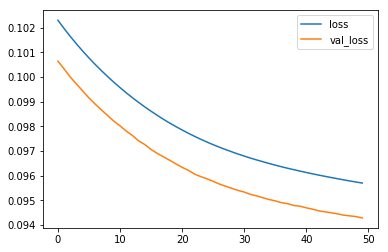

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

(10000, 32)
(10000, 784)


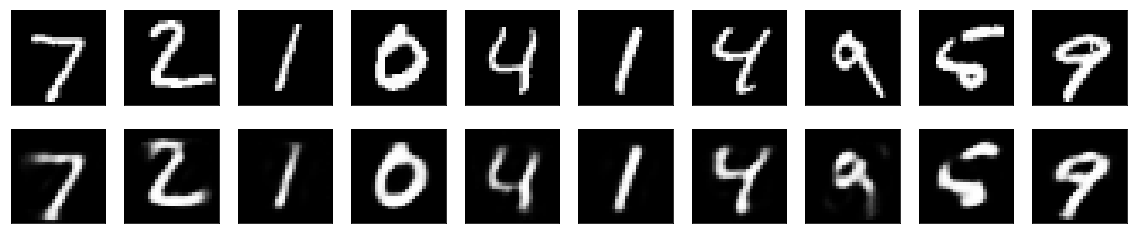

In [46]:
encoded_imgs = encoder.predict(x_test) # latent space
decoded_imgs = decoder.predict(encoded_imgs) # reconstruction
print(encoded_imgs.shape)
print(decoded_imgs.shape)

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape((28,28)), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape((28,28)), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
plt.close()